# **Project Report**

# **SERUM CHOLESTROL AND MAXIMUM HEART RATE ACHIEVED TO DIAGNOSE HEART DISEASE PATIENTS FROM HUNGARY**

Aryan Jain, Vibhav 

## INTRODUCTION

Cardiovascular disease encompasses a spectrum of cardiac conditions originating from malfunctions within the cardiac and vascular systems. Among these, coronary artery disease (CAD) manifests when the arteries responsible for supplying blood to the heart undergo a narrowing process. Numerous risk factors contribute to the predisposition for this malady, including elevated cholesterol levels and the maximum heart rate attained during physiological exertion.

Elevated cholesterol levels precipitate the accumulation of lipid deposits within the vasculature, impeding the smooth flow of blood through the arteries. The rupture of these deposits may culminate in the formation of a thrombus, thereby instigating severe cardiovascular events such as myocardial infarction or stroke. Notably, individuals afflicted by heart disease may experience a notable reduction in their maximum heart rate, as indicated by medical insights provided by WebMD in 2002.

In light of these considerations, the pertinent query arises: can the likelihood of an individual being afflicted by heart disease be ascertained based on an analysis of serum cholesterol levels and the maximum heart rate achieved? To address this question, we propose the utilization of a k-nearest neighbors (KNN) classifier algorithm, an analytical tool with demonstrated efficacy in pattern recognition and classification tasks. By employing this algorithm, we aim to discern discernible patterns and relationships between the aforementioned physiological parameters and the presence of heart disease in a new patient.

Our study involves the utilization of the "processed.hungarian.data" dataset extracted from the Heart Disease Database for the predictive assessment of heart disease presence in patients from Hungary. The dataset comprises several pertinent variables, and our focus is on utilizing the variables "chol" (serum cholesterol level) and "thalach" (maximum heart rate achieved) as predictive features.

The specific columns within the dataset are defined as follows:

1. **age**: Age of the patient
2. **sex**: Gender of the patient (1 = male, 0 = female)
3. **cp**: Chest pain type
4. **trestbps**: Resting blood pressure in mmHg
5. **chol**: Serum cholesterol level in mg/dl
6. **fbs**: Fasting blood sugar > 120 mg/dl? (1 = True, 0 = False)
7. **restecg**: Resting electrocardiographic results
8. **thalach**: Maximum heart rate achieved
9. **exang**: Whether exercise induced angina (1 = True, 0 = False)
10. **oldpeak**: ST depression induced by exercise, relative to rest
11. **slope**: The slope of the peak exercise ST segment (1 = upslope, 2 = flat, 3 = downslope)
12. **ca**: Number of major vessels (0-3) colored by fluoroscopy
13. **thal**: Thalassemia classification (3 = normal, 6 = fixed defect, 7 = reversible defect)
14. **num**: Diagnosis of heart disease (1, 2, 3, 4 = presence, 0 = no presence)

For our analysis, we aim to employ the "chol" and "thalach" variables as predictors to discern the presence or absence of heart disease in patients. This predictive task aligns with the broader objective of leveraging relevant clinical data to enhance diagnostic capabilities and contribute to the advancement of cardiovascular health assessment methodologies.

### Methodology

Data Preprocessing and Exploratory Data Analysis

We initiated our study by importing relevant libraries and acquiring the "reprocessed.hungarian.data" dataset from an authenticated online source. Subsequently, a meticulous data preprocessing phase ensued, wherein we applied systematic cleaning and tidying procedures to render the dataset amenable for analytical endeavors. This process involved judiciously assigning appropriate column types and introducing a new column labeled as "diag" to enhance the interpretability of the data.

To facilitate subsequent analytical procedures, we judiciously partitioned the dataset into distinct training and testing sets. It is noteworthy that our analytical focus remained exclusively on the training set until the final stages of the investigation.

A comprehensive summary of the training set was generated, laying the groundwork for subsequent predictive modeling. This involved the extraction of key insights and patterns from the training data to inform the desired behavior and performance criteria of our classifier.

Visualization emerged as an integral component of our exploratory analysis. Specifically, we employed graphical representations to elucidate the intricate relationship between the variables "thalac" (maximum heart rate achieved) and "chol" (serum cholesterol level). This visual exploration was pivotal in fostering a nuanced understanding of the distributional characteristics inherent in the dataset, thereby contributing to the refinement of subsequent analytical strategies.

### Determining Optimal k for K-Nearest Neighbors Classifier

The objective of this phase in our investigation is to ascertain the optimal value for the parameter 'k' in the k-nearest neighbors (KNN) algorithm, thereby maximizing the accuracy of our predictive model. The subsequent methodology encapsulates a systematic approach towards achieving this goal.

1. **Data Preprocessing and Scaling:**
   We commence by applying the recipe function to center and scale the training data, a crucial step in normalizing variables to a standardized range, facilitating robust and unbiased model training.

2. **Cross-Validation Technique:**
   Cross-validation, an integral aspect of our methodological framework, is executed with ten folds on the training dataset. This deliberate choice of employing ten folds serves to mitigate the influence of the specific observations in the validation set, thus enhancing the robustness and generalizability of our model.

3. **K-Nearest Neighbors Model Initialization:**
   The KNN model is instantiated with the parameter 'neighbours' set to 'tune()', indicative of a deliberate intention to identify the most optimal value for 'k' through subsequent tuning.

4. **Workflow Integration:**
   The recipe and the KNN model are seamlessly integrated into a workflow, with the 'tune_grid' function employed to systematically explore a range of 'k' values specified in 'gridvals' during cross-validation.

5. **Determining Optimal k:**
   The optimal 'k' value is discerned by filtering for accuracy and visualizing the accuracy estimate against the 'k' values through a line plot. This graphical representation serves to elucidate the relationship between 'k' and accuracy, guiding the selection of the most advantageous 'k' value.

6. **Model Evaluation and Validation:**
   Rigorous evaluation ensues to ensure that the selected 'k' value averts both underfitting and overfitting. Furthermore, a comparative analysis against a majority classifier is conducted to validate the efficacy of our model, affirming its superiority in predictive accuracy.

This methodological framework adheres to rigorous standards, leveraging cross-validation and systematic exploration to identify the optimal 'k' for the KNN algorithm, thus enhancing the robustness and reliability of our predictive model.

### Visualizing our results

To visualize our results, we plotted max heart rate on the x-axis and cholesterol levels on the y-axis, using diagnosis to colour the points.

To check for over/underfitting, we coloured the background of the graph based on what prediction would be made at every possible point. This also allowed us to quickly identify how the model classified patients, and where the boundaries were.

### Testing our classifier

Made a new model specification for the best  value chosen, combined with the recipe made earlier in a workflow, and fit the classifier to our training set.

Used predict on the testing set to evaluate the classifier's predicition accuracy on data it hadn't seen before.

Produced a confusion matrix to get a sense of which diagnoses the classifier was more accurate at giving, and what effects that has on real world application.

Tested the accuracy of our classifier when given data from Hungary.

## Preprocessing and exploratory data analysis


In [37]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
install.packages("kknn")

# formatting graphs
options(repr.plot.width = 12, repr.plot.height = 6)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [38]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/reprocessed.hungarian.data"
hungarian_data <- read_delim(url, delim = " ", col_names = FALSE)

head(hungarian_data)

nrow(hungarian_data)

Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0
49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1
37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3
54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0
39,1,3,120,339,0,0,170,0,0.0,-9,-9,-9,0


[1] 294

figure 1

As you can see above, the dataframe does not come with column names, so those must be added. Some factor columns are also being read as <dbl> or <chr>, so those need to be changed as well.

The publisher tells us that each column is numeric-valued and there are 294 rows, with missing data represented as the string "?".

## Data Cleaning and Structuring

The presence of "<chr>" data types in certain columns is attributed to the inclusion of "?" as placeholders for unknown values. In order to facilitate appropriate data type assignment, we undertake a meticulous data cleaning process wherein these "?" entries are systematically replaced with NA values.

Furthermore, to enhance the clinical relevance of our analysis, a binary diagnostic column, denoted as "diag," is introduced. While the existing variable "num" categorizes heart disease by severity, with 0 indicating the absence of the condition, the "diag" variable transcends severity levels. It serves the purpose of classifying patients into two categories—those with or without heart disease. This binary classification, irrespective of disease severity, is imperative in practical healthcare scenarios, as it prompts medical attention and potential treatment recommendations for any manifestation of heart disease. The introduction of the "diag" column underscores the translational utility of our analysis in real-world healthcare contexts.

In [39]:
set.seed(1)
# assigning col names
hungarian_clean <- hungarian_data

colnames(hungarian_clean) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                               "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
                           
# changing "?" into NA
hungarian_clean[ hungarian_clean == "?" ] <- NA

# adding diag column, setting col types
# as.integer is being used to get rid of decimal points when switching to factor
hungarian_clean <- hungarian_clean |>
                    mutate(diag = as.factor(ifelse(is.na(num), NA, (num > 0)))) |>
                    mutate(sex = as.factor(as.integer(sex)), cp = as.factor(as.integer(cp)), 
                            fbs = as.factor(as.integer(fbs)), restecg = as.factor(as.integer(restecg)),
                            exang = as.factor(as.integer(exang)), thal = as.factor(as.integer(thal)),
                            ca = as.factor(as.integer(ca)), slope = as.factor(as.integer(slope))) |>
                     mutate(num = as_factor(num))

head(hungarian_clean)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
40,1,2,140,289,0,0,172,0,0.0,-9,-9,-9,0,FALSE
49,0,3,160,180,0,0,156,0,1.0,2,-9,-9,1,TRUE
37,1,2,130,283,0,1,98,0,0.0,-9,-9,-9,0,FALSE
48,0,4,138,214,0,0,108,1,1.5,2,-9,-9,3,TRUE
54,1,3,150,-9,0,0,122,0,0.0,-9,-9,-9,0,FALSE
39,1,3,120,339,0,0,170,0,0.0,-9,-9,-9,0,FALSE


figure 2

Now our data is clean and tidy!

Since num uses integers to distinguish presence (1,2,3,4) from absence (0), and we want to determine whether or not a patient has heart disease, a new boolean column diag has been appended to narrow diagnoses down to TRUE or FALSE. To be able to stratify by it, we made it a factor column.

#### Splitting our data into training and testing sets

Before working on our model, we need to split our data into training and testing sets. Since we want to predict the new column diag, we will be stratifying by it.

We will use initial_split to split our dataframe into 75% training and 25% testing, since it shuffles our data for us and ensures an constant proportion of each class is present in both. The 75-25 split allows us to train our model on as many data points as possible while also keeping enough data for effective testing later.

In [40]:
#splitting dataframe into training, testing datasets
hungarian_split <- initial_split(hungarian_clean, prop = 3/4, strata = diag)

hungarian_training <- training(hungarian_split)
hungarian_testing <- testing(hungarian_split)

head(hungarian_training)

nrow(hungarian_training)
nrow(hungarian_testing)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,diag
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>
40,1,2,140,289,0,0,172,0,0,-9,-9,-9,0,FALSE
37,1,2,130,283,0,1,98,0,0,-9,-9,-9,0,FALSE
48,0,2,120,284,0,0,120,0,0,-9,-9,-9,0,FALSE
42,0,3,115,211,0,1,137,0,0,-9,-9,-9,0,FALSE
43,0,1,100,223,0,0,142,0,0,-9,-9,-9,0,FALSE
44,1,2,120,184,0,0,142,0,1,2,-9,-9,0,FALSE


[1] 220

[1] 74

figure 3

In the above code, we split the data into a training set to build our model on, and a testing set to, well, test it. Using initial_split allowed us to shuffle the data before splitting (removing bias and order) and stratify the data by diag so that an equal proportion of each is in each set.

There are 220 rows (75%) in the training set and 74 rows (25%) in the testing set. This gives us enough data to train the classifier on, as well as enough to test it on later. This means our classifier is going to be reliable.

Moving forward, we will only use the training set until the very end.

### Summarizing the data

Before we get to work, we need to make sure that the two classes actually have different averages in serum cholersterol and maximum heart rate achieved.

To do this, we will use group_by and summarize to create a table with the minimum, maximum and mean of each of our predictors.

In [41]:
#summarizing to get min, max, mean of each predictor + total no. of rows per class
hungarian_summary <- hungarian_training %>%
                    group_by(diag) %>%
                    summarize(mean_chol = mean(chol), 
                              mean_thalach = mean(thalach),
                              n_of_patients = n())

hungarian_summary

diag,mean_chol,mean_thalach,n_of_patients
<fct>,<dbl>,<dbl>,<int>
FALSE,225.5674,142.8582,141
TRUE,251.6962,130.4810,79


figure 4

To summarize our data, we grouped by diag then summarized for the minimum, maximum and mean of chol and thalach.

We can see that patients with heart disease tend to have higher cholesterol and lower maximum heart rates. Therefore, these trends are what we expect our classifier to predict diagnoses using later. We can also see that the number of TRUE and FALSE diagnoses are roughly balanced in the training set, which means our classifier is unlikely to be biased.

### Visualizing the relationship between predictors and class

To visualize the relationship that cholesterol and maximum heart rate achieved have with a patient's diagnosis, we will use ggplot to generate a scatter plot of chol vs thalach, colouring for diag

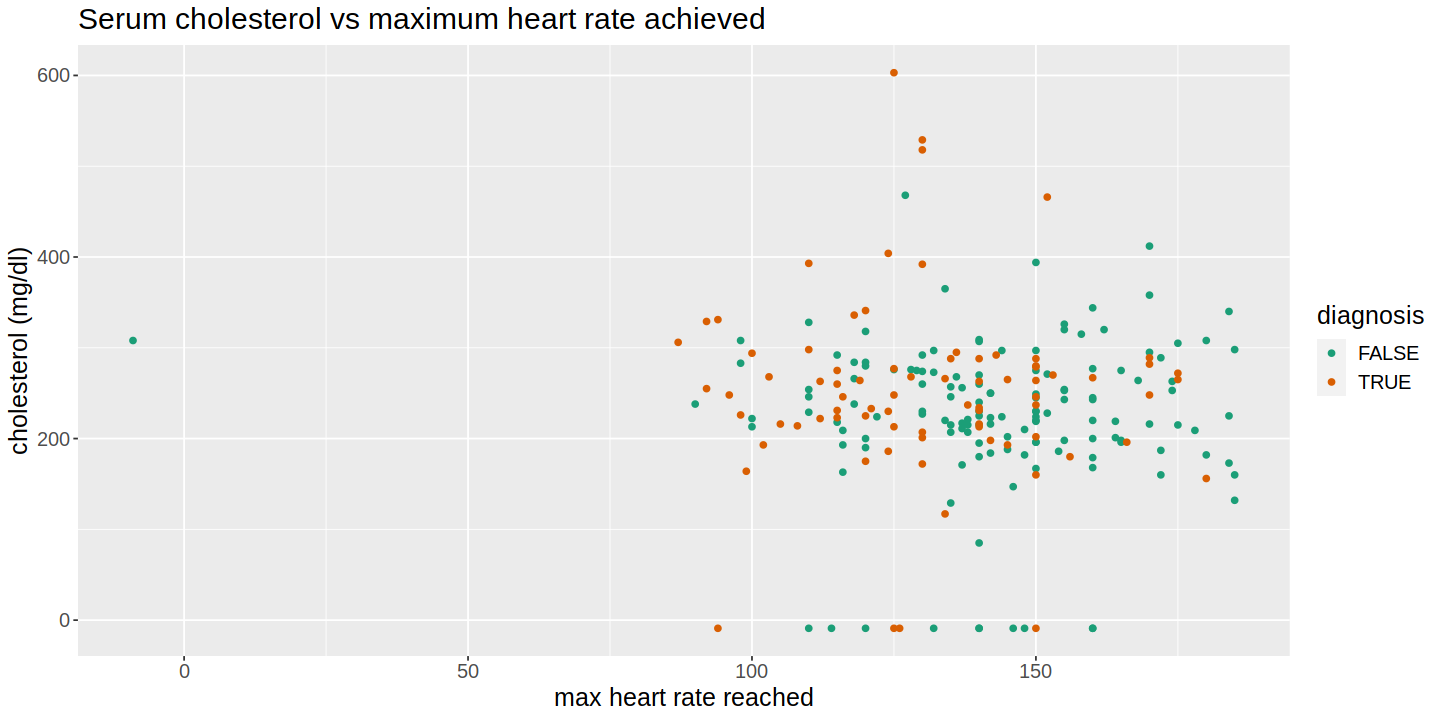

In [42]:
#plotting the training data
chol_thalach <- ggplot(hungarian_training, aes(x = thalach, y = chol, color = diag)) +
                 geom_point() +
                 labs(x = "max heart rate reached", y = "cholesterol (mg/dl)",
                      color = "diagnosis", title = "Serum cholesterol vs maximum heart rate achieved") +
                 scale_color_brewer(palette = "Dark2") +
                 theme(text = element_text(size = 15))


chol_thalach

figure 5

This graph shows that patients with heart disease (orange) tend to have lower maximum heart rates and higher cholesterol, with patients without heart disease (teal) having higher maximum heart rates and a wider range of cholesterol levels.

Seeing it in this form allows us to not only verify what the earlier summary showed us, but also be able to see how outlier affected the values it showed. It also shows us how spread out the classes are.

## Finding the best k value

### Creating the model

To create our model, we need to follow four steps:

1. create a recipe that uses hungarian_training to predict diag, with chol and thalach as predictors.
2. create a specification that uses k-nearest neighbors, with neighbors = tune() to perform cross-validation.
3. split the data into 10 equally sized chunks, known as folds, stratifying by diag.
4. create a workflow combining the first 2 steps, with tune_grid instead of fit.
5. repeat for each validation set for values of 1 ≤  ≤ 100
6. To get the same folds each time, we need to set the seed to 1.

To get the same folds each time, we need to set the seed to 1.

In [45]:
set.seed(1)

# Performing Standardization 
hungarian_recipe <- recipe(diag ~ chol + thalach , data = hungarian_training) |>
   step_scale(all_predictors()) |>
   step_center(all_predictors())

# K-nearest neighbour model specification
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

# Perform 10 fold-cross valdiation
hungarian_vfold <- vfold_cv(hungarian_training, v = 10, strata = diag)

gridvals <- tibble(neighbors = c(1:100))

# Create workflow
knn_results <- workflow() |>
      add_recipe(hungarian_recipe) |>
      add_model(knn_tune) |>
      tune_grid(resamples = hungarian_vfold, grid = gridvals) |>
# Collect metrics, filter for accuracy
      collect_metrics() |>
      filter(.metric == "accuracy") |>
      select(neighbors, mean) |>
      arrange(desc(mean))

head(knn_results)

neighbors,mean
<int>,<dbl>
47,0.6641540
48,0.6641540
49,0.6641540
50,0.6641540
41,0.6596085
42,0.6596085


figure 6

Both k = 47 and  = 48 give us 66.4% accuracy! To pick one, we should plot a line graph of accuracy vs .



### Visualizing Accuracy

Using geom_line, we will be able to view how "safe" each choice is, that is how big of a difference in accuracy a difference of  ± 1 would cause. To do this, we need to plot a graph of accuracy vs neighbors.

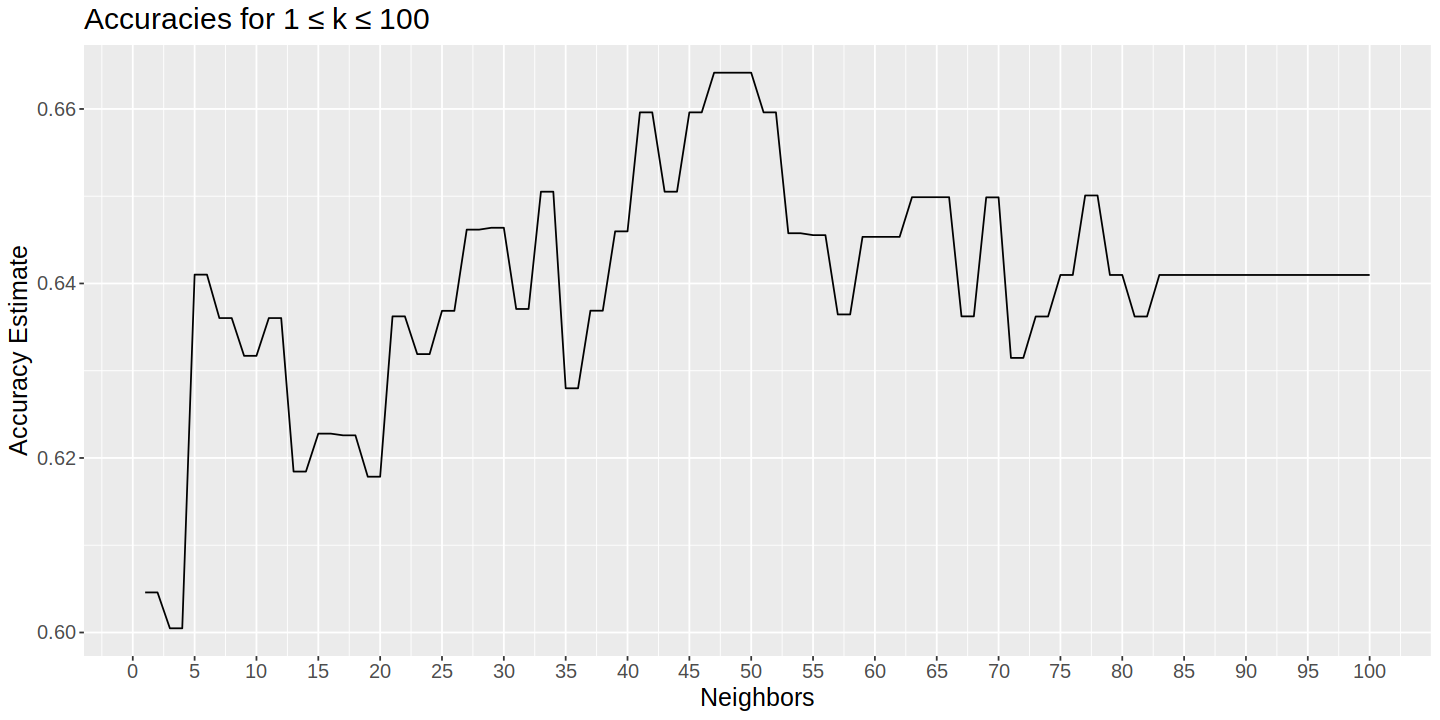

In [46]:
accuracy_versus_k <- ggplot(knn_results, aes(x = neighbors, y = mean))+
      #geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracies for 1 ≤ k ≤ 100") +
      scale_x_continuous(breaks = seq(0, 100, by = 5)) + # adjusting the x-axis
      theme(text = element_text(size = 15))

accuracy_versus_k

figure 7

Looking at the graph above, both give us pretty "safe" values of $k$, because the drops to either side of both points are the same. We will therefore pick  = 47, because it would be easier and quicker to process.